### Install Dependencies

In [3]:
with open('requirements.txt', 'w') as file:
    file.write('Keras>=2\n')
    file.write('numpy>=1.12.1\n')
    file.write('nilearn>=0.3.0\n')
    file.write('tables>=3.4.2\n')
    file.write('nibabel>=2.1.0\n')
    
print('Requirements file created!')

Requirements file created!


In [4]:
!pip install -r requirements.txt

    100% |████████████████████████████████| 2.4MB 14.4MB/s ta 0:00:01
    100% |████████████████████████████████| 3.3MB 9.4MB/s eta 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
!pip install joblib

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-24kuh3x1
  Running setup.py bdist_wheel for keras-contrib ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-_cq79n10/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Download Dataset from S3 Bucket

In [98]:
!aws s3 cp s3://brainhack.neuroavengers/Sub-1.nii.gz /home/ec2-user/SageMaker/data

download: s3://brainhack.neuroavengers/Sub-1.nii.gz to data/Sub-1.nii.gz


In [97]:
# import os
# for file in os.listdir('./data'):
#     os.remove(f'./data/{file}')

In [63]:
import nibabel as nib

img_file = './Sub-1.nii.gz'

brain_img = nib.load(img_file)
brain_img.shape

(182, 218, 182)

#### Find label file

In [109]:
!aws s3 cp s3://brainhack.neuroavengers/Sub-1.nii.gz /home/ec2-user/SageMaker/data

download: s3://brainhack.neuroavengers/Sub-1.nii.gz to data/Sub-1.nii.gz


In [ ]:
!aws s3 cp s3://brainhack.neuroavengers/practice_input.npy /home/ec2-user/SageMaker/data

In [126]:
!pip install s3fs

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [149]:
import s3fs
s3 = s3fs.S3FileSystem(anon=False)

# s3.ls('s3://brainhack.neuroavengers')

In [151]:
bucketname = 's3://brainhack.neuroavengers' # customize to your bucket
filename = 'Sub-1.nii.gz'

print(f'{bucketname}/{filename}')
nib.load('s3://brainhack.neuroavengers/Sub-1.nii.gz')
with s3.open(f'{bucketname}/Sub-1.nii.gz') as brain_img:
    print(type(brain_img))
    nib.load(brain_img)

s3://brainhack.neuroavengers/Sub-1.nii.gz


FileNotFoundError: No such file or no access: 's3://brainhack.neuroavengers/Sub-1.nii.gz'

In [153]:
import boto3
import re
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri
from io import BytesIO

role = get_execution_role()

bucketname = 'brainhack.neuroavengers' # customize to your bucket
filename = 'Sub-1.nii.gz'

s3 = boto3.resource('s3')
obj = s3.Object(bucketname, filename)
body = obj.get()['Body'].read()
print(body)
# contents = body.decode('utf-8')
# s3.Bucket(bucketname).download_file(filename, 'Sub-1copy.nii.gz')
nib.load(body)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ValueError: stat: embedded null character in path

In [155]:
os.listdir()

['requirements.txt',
 'Unet_transfer_learning.ipynb',
 'Sub-1copy.nii.gz',
 'Sub-1.nii.gz',
 'isensee_2017_model.h5',
 'brain.png',
 'object_detection_birds_2019-11-14',
 '.sparkmagic',
 'brain2.png',
 '.ipynb_checkpoints',
 'Sub-1.nii',
 'data',
 'lost+found',
 'isensee_2017_model.h5?dl=1']

### Visualize Image

In [113]:
from nilearn import plotting
display = plotting.plot_anat(brain_img, display_mode='ortho', cut_coords=[36, -27, 60])
display.savefig('brain.png')

TypeError: Data given cannot be loaded because it is not compatible with nibabel format:
s3.Object(bucket_n...

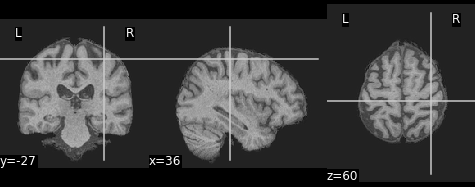

In [65]:
from IPython.display import Image
Image(filename='brain.png')

In [76]:
import matplotlib.pyplot as plt 
import matplotlib.image as img
import numpy as np

im = img.imread('brain.png')
print(im.shape)

im = im[:,:,0:3]
print(im.shape)
img.imsave('brain2.png', im)

(187, 475, 4)
(187, 475, 3)


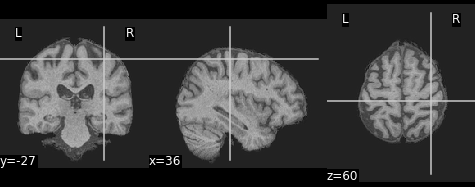

In [77]:
from IPython.display import Image
Image(filename='brain2.png')

### Download Pre-trained Model

In [48]:
!wget https://www.dropbox.com/s/tgr0chjbj5oz2f7/isensee_2017_model.h5

--2019-11-14 02:33:03--  https://www.dropbox.com/s/tgr0chjbj5oz2f7/isensee_2017_model.h5
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tgr0chjbj5oz2f7/isensee_2017_model.h5 [following]
--2019-11-14 02:33:04--  https://www.dropbox.com/s/raw/tgr0chjbj5oz2f7/isensee_2017_model.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca1a8cebeda4be8fb573bea50e6.dl.dropboxusercontent.com/cd/0/inline/AsWJBuZ6Fe5hFymD-XEDEDyx9cx6w1GBB7DwtKB0qZISXKInq1bYZZX_9tPOH-muR6Bf-yqeVlPItU2N15HR90_9JV6oP_O8ut0fCUetWEDJeQ/file# [following]
--2019-11-14 02:33:04--  https://uca1a8cebeda4be8fb573bea50e6.dl.dropboxusercontent.com/cd/0/inline/AsWJBuZ6Fe5hFymD-XEDEDyx9cx6w1GBB7DwtKB0qZISXKInq1bYZZX_9tPOH-muR6Bf-yqeVlPItU2N15HR90_9JV6oP_O8ut0fCUetWEDJ

In [49]:
import os
os.getcwd()
os.listdir()

['requirements.txt',
 'Untitled.ipynb',
 'Sub-1.nii.gz',
 'isensee_2017_model.h5',
 'object_detection_birds_2019-11-14',
 '.sparkmagic',
 '.ipynb_checkpoints',
 'Sub-1.nii',
 'lost+found',
 'isensee_2017_model.h5?dl=1']

In [159]:
from functools import partial

from keras import backend as K


def dice_coefficient(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coefficient_loss(y_true, y_pred):
    return -dice_coefficient(y_true, y_pred)


def weighted_dice_coefficient(y_true, y_pred, axis=(-3, -2, -1), smooth=0.00001):
    """
    Weighted dice coefficient. Default axis assumes a "channels first" data structure
    :param smooth:
    :param y_true:
    :param y_pred:
    :param axis:
    :return:
    """
    return K.mean(2. * (K.sum(y_true * y_pred, axis=axis) + smooth/2)/(K.sum(y_true, axis=axis) + K.sum(y_pred, axis=axis) + smooth))


def weighted_dice_coefficient_loss(y_true, y_pred):
    return -weighted_dice_coefficient(y_true, y_pred)


def label_wise_dice_coefficient(y_true, y_pred, label_index):
    return dice_coefficient(y_true[:, label_index], y_pred[:, label_index])


def get_label_dice_coefficient_function(label_index):
    f = partial(label_wise_dice_coefficient, label_index=label_index)
    f.__setattr__('__name__', 'label_{0}_dice_coef'.format(label_index))
    return f


dice_coef = dice_coefficient
dice_coef_loss = dice_coefficient_loss

In [160]:
from keras.models import load_model
from keras_contrib.layers import InstanceNormalization

model_file = 'isensee_2017_model.h5'

custom_objects = {'dice_coefficient_loss': dice_coefficient_loss, 'dice_coefficient': dice_coefficient,
                      'dice_coef': dice_coef, 'dice_coef_loss': dice_coef_loss,
                      'weighted_dice_coefficient': weighted_dice_coefficient,
                      'weighted_dice_coefficient_loss': weighted_dice_coefficient_loss}

custom_objects["InstanceNormalization"] = InstanceNormalization
# print(custom_objects)
Unet_model = load_model(model_file, custom_objects=custom_objects)

print('Model loaded.')

W1114 19:11:20.971443 140325597321024 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1114 19:11:21.041207 140325597321024 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1114 19:11:21.057559 140325597321024 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1114 19:11:21.058404 140325597321024 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1

Model loaded.


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [69]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 4, 128, 128,  0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 16, 128, 128, 1744        input_1[0][0]                    
__________________________________________________________________________________________________
instance_normalization_1 (Insta (None, 16, 128, 128, 32          conv3d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 16, 128, 128, 0           instance_normalization_1[0][0]   
__________________________________________________________________________________________________
conv3d_2 (

In [71]:
for layer in Unet_model.layers:
    layer.trainable = False

In [83]:
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling3D, MaxPooling3D, LeakyReLU
from keras import backend as K
from keras import regularizers

x = Unet_model.output
x = GlobalAveragePooling3D()(x)

x = Dense(1024, kernel_regularizer=regularizers.l2(0.01))(x)
x = LeakyReLU(alpha=0.05, name='leaky_relu_31')(x)
x = Dropout(0.1)(x)

x = Dense(512, kernel_regularizer=regularizers.l2(0.01))(x)
x = LeakyReLU(alpha=0.05, name='leaky_relu_32')(x)
x = Dropout(0.1)(x)

predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=Unet_model.input, outputs=predictions)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [84]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 4, 128, 128,  0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 16, 128, 128, 1744        input_1[0][0]                    
__________________________________________________________________________________________________
instance_normalization_1 (Insta (None, 16, 128, 128, 32          conv3d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 16, 128, 128, 0           instance_normalization_1[0][0]   
__________________________________________________________________________________________________
conv3d_2 (

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Batch size
bs = 32

# Number of models to ensemble
num_models = 4

# All images will be resized to this value
image_size = (299, 299)

# All images will be rescaled by 1./255. We apply data augmentation here.
train_datagen = ImageDataGenerator(rescale=1./255,
                                   brightness_range= [0.4,1.6],
                                   horizontal_flip=True,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   rotation_range=50,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   preprocessing_function=get_random_eraser(v_l=0, v_h=1),
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

def generate_generator_multiple(generator, num_model, directory, bs, image_size):
  generator1 = generator.flow_from_directory(
      directory= directory, # This is the source directory for training images 
      target_size=image_size, # All images will be resized to value set in image_size
      batch_size=bs,
      class_mode='categorical')
  
  while True:
    generator = generator1.next()
    x_input = []
    
    for i in range(num_model):
      x_input.append(generator[0])
    
    y_input = generator[1]
    
    yield x_input, y_input  #Yield both images and their mutual label

# Flow training images in batches of 32 using train_datagen generator
print("Preparing generator for train dataset")
train_generator = generate_generator_multiple(train_datagen, num_models, train_folder, bs, image_size)

# Flow validation images in batches of 32 using val_datagen generator
print("Preparing generator for validation dataset")
val_generator = generate_generator_multiple(val_datagen, num_models, val_folder, bs, image_size)

In [85]:
from keras.callbacks import ModelCheckpoint

bestValidationCheckpointer = ModelCheckpoint('Unet_transfer_learn.hdf5', monitor='val_acc', save_best_only=True, verbose=1)

In [34]:
history = model.fit_generator(
        train_generator, # train generator has 973 train images
        steps_per_epoch=1092 // bs + 1,
        epochs=100,
        validation_data=val_generator, # validation generator has 253 validation images
        validation_steps=253 // bs + 1,
        callbacks=[bestValidationCheckpointer]
)

    100% |████████████████████████████████| 2.4MB 16.2MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [162]:
import os

import nibabel as nib
import numpy as np
import tables

# from .training import load_old_model
# from .utils import pickle_load
# from .utils.patches import reconstruct_from_patches, get_patch_from_3d_data, compute_patch_indices
# from .augment import permute_data, generate_permutation_keys, reverse_permute_data


def patch_wise_prediction(model, data, overlap=0, batch_size=1, permute=False):
    """
    :param batch_size:
    :param model:
    :param data:
    :param overlap:
    :return:
    """
    patch_shape = tuple([int(dim) for dim in model.input.shape[-3:]])
    predictions = list()
    indices = compute_patch_indices(data.shape[-3:], patch_size=patch_shape, overlap=overlap)
    batch = list()
    i = 0
    while i < len(indices):
        while len(batch) < batch_size:
            patch = get_patch_from_3d_data(data[0], patch_shape=patch_shape, patch_index=indices[i])
            batch.append(patch)
            i += 1
        prediction = predict(model, np.asarray(batch), permute=permute)
        batch = list()
        for predicted_patch in prediction:
            predictions.append(predicted_patch)
    output_shape = [int(model.output.shape[1])] + list(data.shape[-3:])
    return reconstruct_from_patches(predictions, patch_indices=indices, data_shape=output_shape)


def get_prediction_labels(prediction, threshold=0.5, labels=None):
    n_samples = prediction.shape[0]
    label_arrays = []
    for sample_number in range(n_samples):
        label_data = np.argmax(prediction[sample_number], axis=0) + 1
        label_data[np.max(prediction[sample_number], axis=0) < threshold] = 0
        if labels:
            for value in np.unique(label_data).tolist()[1:]:
                label_data[label_data == value] = labels[value - 1]
        label_arrays.append(np.array(label_data, dtype=np.uint8))
    return label_arrays


def get_test_indices(testing_file):
    return pickle_load(testing_file)


def predict_from_data_file(model, open_data_file, index):
    return model.predict(open_data_file.root.data[index])


def predict_and_get_image(model, data, affine):
    return nib.Nifti1Image(model.predict(data)[0, 0], affine)


def predict_from_data_file_and_get_image(model, open_data_file, index):
    return predict_and_get_image(model, open_data_file.root.data[index], open_data_file.root.affine)


def predict_from_data_file_and_write_image(model, open_data_file, index, out_file):
    image = predict_from_data_file_and_get_image(model, open_data_file, index)
    image.to_filename(out_file)


def prediction_to_image(prediction, affine, label_map=False, threshold=0.5, labels=None):
    if prediction.shape[1] == 1:
        data = prediction[0, 0]
        if label_map:
            label_map_data = np.zeros(prediction[0, 0].shape, np.int8)
            if labels:
                label = labels[0]
            else:
                label = 1
            label_map_data[data > threshold] = label
            data = label_map_data
    elif prediction.shape[1] > 1:
        if label_map:
            label_map_data = get_prediction_labels(prediction, threshold=threshold, labels=labels)
            data = label_map_data[0]
        else:
            return multi_class_prediction(prediction, affine)
    else:
        raise RuntimeError("Invalid prediction array shape: {0}".format(prediction.shape))
    return nib.Nifti1Image(data, affine)


def multi_class_prediction(prediction, affine):
    prediction_images = []
    for i in range(prediction.shape[1]):
        prediction_images.append(nib.Nifti1Image(prediction[0, i], affine))
    return prediction_images


def run_validation_case(data_index, output_dir, model, data_file, training_modalities,
                        output_label_map=False, threshold=0.5, labels=None, overlap=16, permute=False):
    """
    Runs a test case and writes predicted images to file.
    :param data_index: Index from of the list of test cases to get an image prediction from.
    :param output_dir: Where to write prediction images.
    :param output_label_map: If True, will write out a single image with one or more labels. Otherwise outputs
    the (sigmoid) prediction values from the model.
    :param threshold: If output_label_map is set to True, this threshold defines the value above which is 
    considered a positive result and will be assigned a label.  
    :param labels:
    :param training_modalities:
    :param data_file:
    :param model:
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    affine = data_file.root.affine[data_index]
    test_data = np.asarray([data_file.root.data[data_index]])
    for i, modality in enumerate(training_modalities):
        image = nib.Nifti1Image(test_data[0, i], affine)
        image.to_filename(os.path.join(output_dir, "data_{0}.nii.gz".format(modality)))

    test_truth = nib.Nifti1Image(data_file.root.truth[data_index][0], affine)
    test_truth.to_filename(os.path.join(output_dir, "truth.nii.gz"))

    patch_shape = tuple([int(dim) for dim in model.input.shape[-3:]])
    if patch_shape == test_data.shape[-3:]:
        prediction = predict(model, test_data, permute=permute)
    else:
        prediction = patch_wise_prediction(model=model, data=test_data, overlap=overlap, permute=permute)[np.newaxis]
    prediction_image = prediction_to_image(prediction, affine, label_map=output_label_map, threshold=threshold,
                                           labels=labels)
    if isinstance(prediction_image, list):
        for i, image in enumerate(prediction_image):
            image.to_filename(os.path.join(output_dir, "prediction_{0}.nii.gz".format(i + 1)))
    else:
        prediction_image.to_filename(os.path.join(output_dir, "prediction.nii.gz"))


def run_validation_cases(validation_keys_file, model_file, training_modalities, labels, hdf5_file,
                         output_label_map=False, output_dir=".", threshold=0.5, overlap=16, permute=False):
    validation_indices = pickle_load(validation_keys_file)
    model = load_old_model(model_file)
    data_file = tables.open_file(hdf5_file, "r")
    for index in validation_indices:
        if 'subject_ids' in data_file.root:
            case_directory = os.path.join(output_dir, data_file.root.subject_ids[index].decode('utf-8'))
        else:
            case_directory = os.path.join(output_dir, "validation_case_{}".format(index))
        run_validation_case(data_index=index, output_dir=case_directory, model=model, data_file=data_file,
                            training_modalities=training_modalities, output_label_map=output_label_map, labels=labels,
                            threshold=threshold, overlap=overlap, permute=permute)
    data_file.close()


def predict(model, data, permute=False):
    if permute:
        predictions = list()
        for batch_index in range(data.shape[0]):
            predictions.append(predict_with_permutations(model, data[batch_index]))
        return np.asarray(predictions)
    else:
        return model.predict(data)


def predict_with_permutations(model, data):
    predictions = list()
    for permutation_key in generate_permutation_keys():
        temp_data = permute_data(data, permutation_key)[np.newaxis]
        predictions.append(reverse_permute_data(model.predict(temp_data)[0], permutation_key))
    return np.mean(predictions, axis=0)

In [161]:
Unet_model.output

<tf.Tensor 'activation_1/Sigmoid:0' shape=(?, 3, 128, 128, 128) dtype=float32>

In [175]:
data = np.load('./data/practice_input.npy')
print(data.shape)
np.resize(data,(1,4,128,128,128))
data.shape

FileNotFoundError: [Errno 2] No such file or directory: './data/practice_input.npy'

In [171]:
a=np.array([[0,1],[2,3]])
np.resize(a,(2,3))

array([[0, 1, 2],
       [3, 0, 1]])

In [168]:
predict(Unet_model, data)

ValueError: Error when checking input: expected input_1 to have shape (4, 128, 128, 128) but got array with shape (1, 182, 218, 182)